In [6]:
pip install spotipy --upgrade

  Using cached spotipy-2.24.0-py3-none-any.whl.metadata (4.9 kB)
  Using cached redis-5.0.8-py3-none-any.whl.metadata (9.2 kB)
Using cached spotipy-2.24.0-py3-none-any.whl (30 kB)
Using cached redis-5.0.8-py3-none-any.whl (255 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import spotipy
import pandas as pd

In [9]:
pip install python-dotenv


Note: you may need to restart the kernel to use updated packages.


In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

client_id = os.getenv('SPOTIPY_CLIENT_ID')
client_secret = os.getenv('SPOTIPY_CLIENT_SECRET')
redirect_uri = os.getenv('SPOTIPY_REDIRECT_URI')

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

scope = "user-library-read"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope,
                                               client_id=client_id,
                                               client_secret=client_secret,
                                               redirect_uri=redirect_uri
                                               ))


In [27]:
sp.track('6uHN30qEgxZ25VPhnrXsLr').keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [4]:

def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [ ]:
def get_track_features(id):
    
    metadata = sp.track(id)
    features = sp.audio_features(id)

    track_features = {}
    # metadata
    track_features['name'] = metadata['name']
    track_features['album'] = metadata['album']['name']
    track_features['artist'] = metadata['album']['artists'][0]['name']
    track_features['release_date'] = metadata['album']['release_date']
    track_features['length'] = metadata['duration_ms']
    track_features['popularity'] = metadata['popularity']

    # audio features
    track_features['acousticness'] = features[0]['acousticness']
    track_features['danceability'] = features[0]['danceability']
    track_features['energy'] = features[0]['energy']
    track_features['instrumentalness'] = features[0]['instrumentalness']
    track_features['liveness'] = features[0]['liveness']
    track_features['loudness'] = features[0]['loudness']
    track_features['speechiness'] = features[0]['speechiness']
    track_features['tempo'] = features[0]['tempo']
    track_features['time_signature'] = features[0]['time_signature']

    # track = [name, album, artist, release_date, length, popularity, danceability, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track_features

In [78]:
playlist_tracks = get_playlist_tracks(1285513784, '0F8NbDqwmcyuq0NuWAFc2b')

In [79]:
playlist_tracks_features = []
for track in playlist_tracks:
    playlist_tracks_features.append(get_track_features(track['track']['id']))

In [109]:
songs_df = pd.DataFrame(playlist_tracks_features)

features = [
    'danceability',
    'energy',
    # 'key',
    'loudness',
    # 'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    # 'valence',
    'tempo',
    # 'duration_ms'
]

songs_df = songs_df.set_index(['name'])
songs_df = songs_df[features]
songs_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
name,,,,,,,,
Horchata,0.835,0.787,-7.078,0.1430,0.0741,0.000000,0.2940,120.000
White Sky,0.572,0.684,-5.640,0.0649,0.1140,0.007850,0.3640,135.926
Holiday,0.717,0.775,-5.241,0.1090,0.0222,0.000771,0.1260,155.857
California English,0.608,0.643,-8.369,0.3200,0.0845,0.000004,0.3690,164.404
Taxi Cab,0.694,0.364,-15.761,0.0668,0.2950,0.493000,0.0796,167.941
...,...,...,...,...,...,...,...,...
Movies,0.189,0.362,-8.915,0.0331,0.6490,0.390000,0.1060,111.783
Mirror Forever,0.334,0.283,-11.063,0.0310,0.5100,0.002440,0.0807,108.744
Wild Time,0.385,0.423,-9.934,0.0269,0.5450,0.007280,0.2100,140.663


In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(songs_df)

pca = PCA().fit(X_scaled)
pca_res = pca.transform(X_scaled)

pca_res_df = pd.DataFrame(pca_res, columns=[f"PC{i}" for i in range(1, pca_res.shape[1] + 1)], index=songs_df.index)
pca_res_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
name,,,,,,,,
Horchata,-2.051462,2.287489,1.517288,-0.727942,0.982968,-0.426734,0.127633,-0.080052
White Sky,-1.669619,0.525890,1.000630,0.589603,-0.302912,-0.703928,0.013459,0.266565
Holiday,-2.229192,1.413423,0.321055,-1.406087,-0.324309,-0.071513,0.117324,0.112955
California English,-2.025801,2.392481,5.262954,-2.743572,0.032254,1.281095,0.435441,0.494720
Taxi Cab,0.633830,0.240714,-0.021975,-2.278966,-0.120168,-1.343207,1.231122,-0.131660


In [82]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

font_dir = ["Roboto_Condensed"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["font.size"] = 14
plt.rcParams["figure.titlesize"] = "xx-large"
plt.rcParams["xtick.labelsize"] = "medium"
plt.rcParams["ytick.labelsize"] = "medium"
plt.rcParams["axes.axisbelow"] = True
# plt.rcParams["font.family"] = "Roboto Condensed"

findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Fo

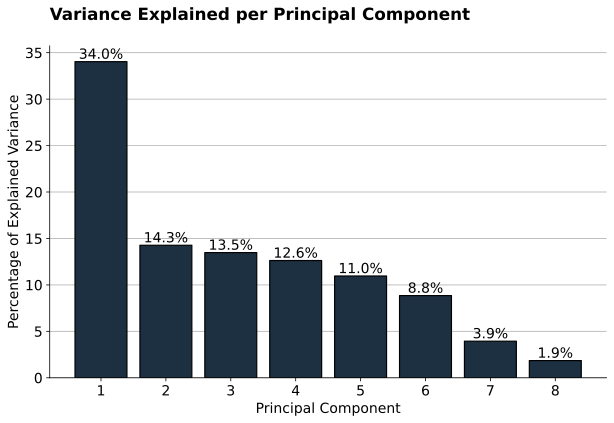

In [83]:
plot_y = [val * 100 for val in pca.explained_variance_ratio_]
plot_x = range(1, len(plot_y) + 1)

bars = plt.bar(plot_x, plot_y, align="center", color="#1C3041", edgecolor="#000000", linewidth=1.2)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, f"{yval:.1f}%", ha="center", va="bottom")

plt.xlabel("Principal Component")
plt.ylabel("Percentage of Explained Variance")
plt.title("Variance Explained per Principal Component", loc="left", fontdict={"weight": "bold"}, y=1.06)
plt.grid(axis="y")
plt.xticks(plot_x)

plt.show()

findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Fo

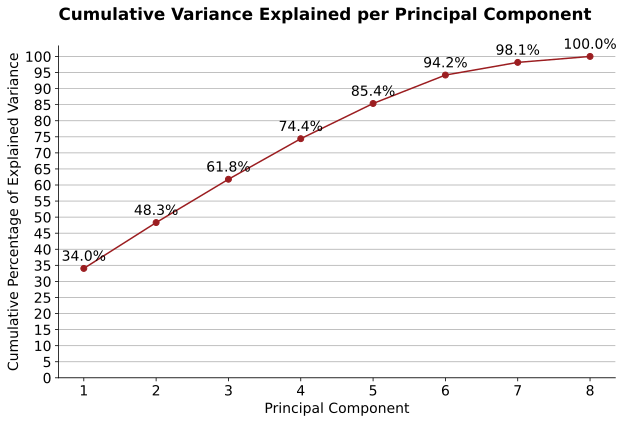

In [84]:
exp_var = [val * 100 for val in pca.explained_variance_ratio_]
plot_y = [sum(exp_var[:i+1]) for i in range(len(exp_var))]
plot_x = range(1, len(plot_y) + 1)

plt.plot(plot_x, plot_y, marker="o", color="#9B1D20")
for x, y in zip(plot_x, plot_y):
    plt.text(x, y + 1.5, f"{y:.1f}%", ha="center", va="bottom")

plt.xlabel("Principal Component")
plt.ylabel("Cumulative Percentage of Explained Variance")
plt.title("Cumulative Variance Explained per Principal Component", loc="left", fontdict={"weight": "bold"}, y=1.06)

plt.yticks(range(0, 101, 5))
plt.grid(axis="y")
plt.xticks(plot_x)

plt.show()

In [85]:
import numpy as np

findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Fo

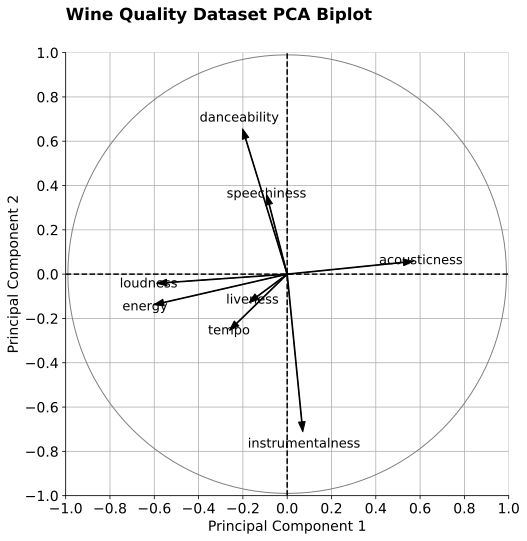

In [86]:
labels = songs_df.columns
n = len(labels)
coeff = np.transpose(pca.components_)
pc1 = pca.components_[:, 0]
pc2 = pca.components_[:, 1]

plt.figure(figsize=(8, 8))

for i in range(n):
    plt.arrow(x=0, y=0, dx=coeff[i, 0], dy=coeff[i, 1], color="#000000", width=0.003, head_width=0.03)
    plt.text(x=coeff[i, 0] * 1.15, y=coeff[i, 1] * 1.15, s=labels[i], size=13, color="#000000", ha="center", va="center")

plt.axis("square")
plt.title(f"Wine Quality Dataset PCA Biplot", loc="left", fontdict={"weight": "bold"}, y=1.06)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks(np.arange(-1, 1.1, 0.2))
plt.yticks(np.arange(-1, 1.1, 0.2))

plt.axhline(y=0, color="black", linestyle="--")
plt.axvline(x=0, color="black", linestyle="--")
circle = plt.Circle((0, 0), 0.99, color="gray", fill=False)
plt.gca().add_artist(circle)

plt.grid()
plt.show()


findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Fo

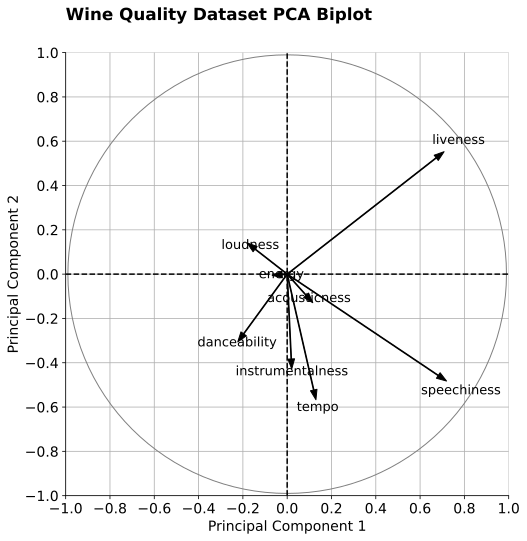

In [87]:
labels = songs_df.columns
n = len(labels)
coeff = np.transpose(pca.components_)
pc1 = pca.components_[:, 0]
pc2 = pca.components_[:, 1]

plt.figure(figsize=(8, 8))

for i in range(n):
    plt.arrow(x=0, y=0, dx=coeff[i, 2], dy=coeff[i, 3], color="#000000", width=0.003, head_width=0.03)
    plt.text(x=coeff[i, 2] * 1.15, y=coeff[i, 3] * 1.15, s=labels[i], size=13, color="#000000", ha="center", va="center")

plt.axis("square")
plt.title(f"Wine Quality Dataset PCA Biplot", loc="left", fontdict={"weight": "bold"}, y=1.06)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks(np.arange(-1, 1.1, 0.2))
plt.yticks(np.arange(-1, 1.1, 0.2))

plt.axhline(y=0, color="black", linestyle="--")
plt.axvline(x=0, color="black", linestyle="--")
circle = plt.Circle((0, 0), 0.99, color="gray", fill=False)
plt.gca().add_artist(circle)

plt.grid()
plt.show()


In [92]:
indices

array([[   0,   36,   45,  567, 1142],
       [   1,  578,  277,  129, 1130],
       [   2, 1140,   83,   90,  131],
       ...,
       [1269,  853,  256,  382, 1145],
       [1270, 1237, 1164, 1161,  161],
       [1271, 1081,  874, 1266, 1098]], dtype=int64)

In [89]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=5, 
                        algorithm='ball_tree').fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

In [96]:
indices

array([[   0,   36,   45,  567, 1142],
       [   1,  578,  277,  129, 1130],
       [   2, 1140,   83,   90,  131],
       ...,
       [1269,  853,  256,  382, 1145],
       [1270, 1237, 1164, 1161,  161],
       [1271, 1081,  874, 1266, 1098]], dtype=int64)

In [99]:
songs_df.index

MultiIndex([(            'Horchata',         'Contra'),
            (           'White Sky',         'Contra'),
            (             'Holiday',         'Contra'),
            (  'California English',         'Contra'),
            (            'Taxi Cab',         'Contra'),
            (                 'Run',         'Contra'),
            (             'Cousins',         'Contra'),
            (   'Giving Up The Gun',         'Contra'),
            (      'Diplomat’s Son',         'Contra'),
            ( 'I Think Ur A Contra',         'Contra'),
            ...
            ('A Lot's Gonna Change', 'Titanic Rising'),
            (           'Andromeda', 'Titanic Rising'),
            (            'Everyday', 'Titanic Rising'),
            ('Something to Believe', 'Titanic Rising'),
            (      'Titanic Rising', 'Titanic Rising'),
            (              'Movies', 'Titanic Rising'),
            (      'Mirror Forever', 'Titanic Rising'),
            (           'Wild Ti

In [103]:
monotonic_index = pd.Index(list('abbc'))
monotonic_index

Index(['a', 'b', 'b', 'c'], dtype='object')

In [106]:
songs_df.index = songs_df.index.droplevel(1)

In [107]:
songs_df.index.get_loc('Horchata')

0

In [123]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler



# Function to find nearest neighbors by ID (without re-fitting the model)
def get_nearest_neighbors(df, nn_model, scaler, query_index, n_neighbors=3):

    # Get the scaled data point for the query_ndex (no need to re-scale everything)
    query_point = scaler.transform(df.loc[[query_index]])
    
    # Get the neighbors (including itself)
    distances, indices = nn_model.kneighbors(query_point, n_neighbors=n_neighbors)
    
    # Extract the neighbor IDs and distances
    neighbor_ids = df.index[indices.flatten()].tolist()
    neighbor_distances = distances.flatten().tolist()
    
    return list(zip(neighbor_ids, neighbor_distances))


The nearest neighbors for Horchata are:
Song: Horchata, Distance: 0.0
Song: White Flag (feat. Bashy, Kano and the National Orchestra for Arabic Music), Distance: 1.42
Song: Sweepstakes (feat. Mos Def and Hypnotic Brass Ensemble), Distance: 1.58
Song: Rattlesnake, Distance: 1.82
Song: Hollywood (feat. Snoop Dogg & Jamie Principle), Distance: 2.01


In [195]:
songs_df = pd.DataFrame(playlist_tracks_features)

features = [
    'artist',
    'danceability',
    'energy',
    # 'key',
    # 'loudness',
    # 'mode',
    # 'speechiness',
    'acousticness',
    'instrumentalness',
    # 'liveness',
    # 'valence',
    # 'tempo',
    # 'duration_ms'
    'popularity'
]

songs_df = songs_df.set_index(['name'])
songs_df = songs_df[features]
songs_df

,artist,danceability,energy,acousticness,instrumentalness,popularity
name,,,,,,
Horchata,Vampire Weekend,0.835,0.787,0.0741,0.000000,0
White Sky,Vampire Weekend,0.572,0.684,0.1140,0.007850,0
Holiday,Vampire Weekend,0.717,0.775,0.0222,0.000771,0
California English,Vampire Weekend,0.608,0.643,0.0845,0.000004,0
Taxi Cab,Vampire Weekend,0.694,0.364,0.2950,0.493000,0
...,...,...,...,...,...,...
Movies,Weyes Blood,0.189,0.362,0.6490,0.390000,0
Mirror Forever,Weyes Blood,0.334,0.283,0.5100,0.002440,0
Wild Time,Weyes Blood,0.385,0.423,0.5450,0.007280,0


In [178]:
sp.search(q='Ichiko Aoba', type='artist', limit=1)['artists']['items'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/6ignRjbPmLvKdtMLj9a5Xs'},
 'followers': {'href': None, 'total': 745716},
 'genres': ['j-acoustic'],
 'href': 'https://api.spotify.com/v1/artists/6ignRjbPmLvKdtMLj9a5Xs',
 'id': '6ignRjbPmLvKdtMLj9a5Xs',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb0492fac92c61b57890860332',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051740492fac92c61b57890860332',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1780492fac92c61b57890860332',
   'width': 160}],
 'name': 'Ichiko Aoba',
 'popularity': 61,
 'type': 'artist',
 'uri': 'spotify:artist:6ignRjbPmLvKdtMLj9a5Xs'}

In [239]:
'Adam Green' == 'Adam Green'

True

In [254]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


# Function to get artist genres
def get_artist_genre(artist_name):
    # Search for the artist by name
    limit=5
    results = sp.search(q=artist_name, type='artist', limit=limit)
    
    if results['artists']['items']:
        # sometimes the search gives incorrect results, we make sure the
        # artist is the one we're looking for
        for i in range(limit):
            
            artist = results['artists']['items'][i]  # Get the first search result
            # print(artist['name'])
            if artist_name == artist['name']:
                artist_genre = artist['genres'][0]  # Get genres
                return artist_genre
    else:
        return None

# Function to get artist genres
def get_artist_genres(artist_name):
    
    limit = 5
    # Search for the artist by name
    results = sp.search(q=artist_name, type='artist', limit=limit)
    if results['artists']['items']:
        # sometimes the search gives incorrect results, we make sure the
        # artist is the one we're looking for
        for i in range(limit):
            artist = results['artists']['items'][i]  # Get the first search result
            if artist_name == artist['name']:
                artist_genres = artist['genres']  # Get genres
        # artist_genre = artist['genres'][0]  # Get genres
                return artist_genres
        return None
    else:
        return None


In [274]:

# Example usage
artist_name = 'Jonny Greenwood'
genre = get_artist_genre(artist_name=artist_name)
genres = get_artist_genres(artist_name=artist_name)


if artist_name:
    print(f"Genres for {artist_name}: {', '.join(genres)}")
    print(f"Genres for {artist_name}: {genre}")
else:
    print("Artist not found.")


Jonny Greenwood
Genres for Jonny Greenwood: british contemporary classical, british soundtrack, compositional ambient
Genres for Jonny Greenwood: british contemporary classical


In [230]:
reults = sp.search(q='Adam Green', type='artist', limit=5)

In [231]:
reults['artists']['items'][0]['name'] 

'Adam Green'

In [225]:
songs_df.groupby('artist').first()

,danceability,energy,acousticness,instrumentalness,popularity,genre
artist,,,,,,
Adam Green,0.639,0.323,0.6790,0.000103,30,anti-folk
Alabama Shakes,0.590,0.667,0.1810,0.338000,0,alabama indie
Alvvays,0.327,0.948,0.0355,0.515000,0,art pop
Angel Olsen,0.545,0.128,0.9430,0.022500,0,alternative americana
Arcade Fire,0.616,0.682,0.0578,0.024100,55,alternative rock
...,...,...,...,...,...,...
Tobias Jesso Jr.,0.479,0.272,0.7860,0.186000,0,beatlesque
Vampire Weekend,0.835,0.787,0.0741,0.000000,0,baroque pop
Weyes Blood,0.221,0.347,0.6290,0.000665,0,art pop


In [275]:
songs_df[songs_df.genre == 'alternative americana']

,artist,danceability,energy,acousticness,instrumentalness,popularity,genre
name,,,,,,,
Unfucktheworld,Angel Olsen,0.545,0.1280,0.943000,0.022500,0,alternative americana
Forgiven/Forgotten,Angel Olsen,0.566,0.8690,0.000005,0.309000,0,alternative americana
Hi-Five,Angel Olsen,0.514,0.5740,0.044300,0.008260,0,alternative americana
White Fire,Angel Olsen,0.243,0.0694,0.882000,0.000204,0,alternative americana
High & Wild,Angel Olsen,0.562,0.8060,0.001800,0.004030,0,alternative americana
Lights Out,Angel Olsen,0.460,0.4380,0.038000,0.000063,0,alternative americana
Stars,Angel Olsen,0.456,0.7390,0.000214,0.000577,0,alternative americana
Iota,Angel Olsen,0.417,0.1520,0.806000,0.003260,0,alternative americana
Dance Slow Decades,Angel Olsen,0.403,0.2460,0.055900,0.108000,0,alternative americana


In [297]:
reults = sp.search(q='The National', type='artist', limit=5)

In [298]:
for i in range(20):
    print(sp.artist_related_artists(reults['artists']['items'][0]['id'] )['artists'][i]['name'])


Matt Berninger
Arcade Fire
EL VY
The War On Drugs
Future Islands
Band of Horses
Grizzly Bear
Sharon Van Etten
Big Red Machine
Fleet Foxes
The Shins
Broken Social Scene
TV On The Radio
LCD Soundsystem
Beirut
Wilco
Father John Misty
Bon Iver
Kurt Vile
Editors


In [269]:
songs_df.genre.unique()

array(['baroque pop', 'art pop', 'downtempo', 'alternative hip hop',
       'british folk', 'alternative rock', 'chamber pop',
       'australian psych', 'deep gothic post-punk', 'garage rock',
       'bay area indie', 'britpop', 'spanish indie folk',
       'british indie rock', 'alternative country', 'brooklyn indie',
       'nottingham indie', 'canadian indie', 'alabama indie', 'anti-folk',
       'electro', 'alternative americana', 'beatlesque', 'indie rock',
       'art rock', 'canadian singer-songwriter', 'ambient folk',
       'alternative dance', 'british contemporary classical', 'furry',
       'modern alternative rock', 'new jersey indie'], dtype=object)

In [265]:
# Precompute genres for each artist
genre_lookup = songs_df.groupby('artist').apply(lambda x: get_artist_genre(x.name)).to_dict()

# Map the results back to the DataFrame
songs_df['genre'] = songs_df['artist'].map(genre_lookup)

Adam Green
Alabama Shakes
Alvvays
Angel Olsen
Arcade Fire
Arctic Monkeys
Bahamas
Beach House
Belle and Sebastian
Big Thief
Billie Eilish
Blur
Bon Iver
Broken Social Scene
Car Seat Headrest
Courtney Barnett
DIIV
Daft Punk
Damon Albarn
David Bowie
Deerhunter
Destroyer
Father John Misty
Feist
Fleet Foxes
Foxygen
Girls
Gorillaz
Grizzly Bear
Jake Bugg
Jonny Greenwood
Julie Byrne
Karen O
Kasabian
LCD Soundsystem
Lana Del Rey
Laura Marling
Leonard Cohen
Lorde
Low
M. Ward
MGMT
Massive Attack
Mitski
Motorama
Mount Eerie
New Order
Nick Cave & The Bad Seeds
PJ Harvey
Perfume Genius
Radiohead
Russian Red
Sharon Van Etten
Slowdive
Spoon
St. Vincent
Suede
Sufjan Stevens
Tame Impala
Tennis
The Black Keys
The Good, the Bad & the Queen
The Libertines
The Maccabees
The National
The Strokes
The War On Drugs
The xx
Tobias Jesso Jr.
Vampire Weekend
Weyes Blood
Wolf Alice
Yo La Tengo


In [262]:
songs_df.groupby('artist')['artist'].transform(lambda row: get_artist_genre(row))

Adam Green


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [197]:
songs_df['genre'] = songs_df.apply(lambda row: get_artist_genres(row['artist']), axis=1)

In [212]:
songs_df[songs_df.artist == 'MGMT']

,artist,danceability,energy,acousticness,instrumentalness,popularity,genre
name,,,,,,,
It's Working,MGMT,0.381,0.954,0.05630,0.000835,40,alternative rock
Song for Dan Treacy,MGMT,0.453,0.977,0.00314,0.000494,37,australian psych
Someone's Missing,MGMT,0.308,0.360,0.53400,0.032000,37,australian psych
Flash Delirium,MGMT,0.575,0.804,0.08260,0.000363,43,alternative rock
I Found a Whistle,MGMT,0.166,0.525,0.54900,0.020000,34,australian psych
Siberian Breaks,MGMT,0.305,0.770,0.06200,0.203000,41,alternative rock
Brian Eno,MGMT,0.374,0.969,0.00851,0.002890,35,australian psych
Lady Dada's Nightmare,MGMT,0.354,0.477,0.56800,0.911000,29,australian psych
Congratulations,MGMT,0.761,0.637,0.43900,0.008200,57,alternative rock


In [203]:
songs_df[songs_df.genre == 'australian psych']

,artist,danceability,energy,acousticness,instrumentalness,popularity,genre
name,,,,,,,
Song for Dan Treacy,MGMT,0.453,0.977,0.003140,0.000494,37,australian psych
Someone's Missing,MGMT,0.308,0.360,0.534000,0.032000,37,australian psych
I Found a Whistle,MGMT,0.166,0.525,0.549000,0.020000,34,australian psych
Brian Eno,MGMT,0.374,0.969,0.008510,0.002890,35,australian psych
Lady Dada's Nightmare,MGMT,0.354,0.477,0.568000,0.911000,29,australian psych
It Is Not Meant To Be,Tame Impala,0.429,0.895,0.013300,0.001270,53,australian psych
Desire Be Desire Go,Tame Impala,0.372,0.853,0.069000,0.005290,50,australian psych
Alter Ego,Tame Impala,0.317,0.846,0.014600,0.130000,54,australian psych
Lucidity,Tame Impala,0.367,0.872,0.109000,0.094400,51,australian psych


In [200]:
songs_df.genre.unique()

array(['baroque pop', 'art pop', 'downtempo', 'alternative hip hop',
       'british folk', 'alternative rock', 'australian psych',
       'chamber pop', 'deep gothic post-punk', 'garage rock', 'k-pop',
       'britpop', 'spanish indie folk', 'british indie rock',
       'alternative country', 'brooklyn indie', 'nottingham indie',
       'canadian indie', 'alabama indie', 'anti-folk', 'electro',
       'alternative americana', 'beatlesque', 'indie rock', 'art rock',
       'canadian singer-songwriter', 'ambient folk', 'alternative dance',
       'british contemporary classical', 'furry',
       'modern alternative rock', 'new jersey indie'], dtype=object)

In [137]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(songs_df)

nn = NearestNeighbors(n_neighbors=3, 
                      metric='euclidean',)
nn.fit(X_scaled)

NearestNeighbors(metric='euclidean', n_neighbors=3)

In [138]:

# Example usage
query_index = 'Zebra'
neighbors = get_nearest_neighbors(songs_df, nn, scaler, query_index, n_neighbors=15)

print(f"The nearest neighbors for {query_index} are:")
for neighbor_id, distance in neighbors:
    print(f"Song: {neighbor_id}, Distance: {round(distance,2)}")


The nearest neighbors for Zebra are:
Song: Zebra, Distance: 0.0
Song: Pleasantries, Distance: 0.26
Song: Into You, Distance: 0.44
Song: Impossible Soul, Distance: 0.45
Song: Real Love, Distance: 0.49
Song: New World Towers, Distance: 0.49
Song: Fuck it I love you, Distance: 0.52
Song: Cattails, Distance: 0.54
Song: Vesuvius, Distance: 0.57
Song: Lady Boston, Distance: 0.58
Song: This Feeling, Distance: 0.6
Song: How Could You Babe, Distance: 0.61
Song: I Walked, Distance: 0.62
Song: I Need My Girl, Distance: 0.62
Song: Drown, Distance: 0.63


In [121]:
songs_df.loc[query_index]

danceability          0.8350
energy                0.7870
loudness             -7.0780
speechiness           0.1430
acousticness          0.0741
instrumentalness      0.0000
liveness              0.2940
tempo               120.0000
Name: Horchata, dtype: float64

In [90]:
X_scaled

array([[ 2.29033645,  0.93716585,  0.52454201, ..., -0.71074795,
         0.95168299,  0.01894278],
       [ 0.59206831,  0.52087905,  0.86441052, ..., -0.68524798,
         1.49180363,  0.55370849],
       [ 1.52837584,  0.88866642,  0.9587134 , ..., -0.70824343,
        -0.34460655,  1.22295471],
       ...,
       [-0.61544554, -0.53398363, -0.15046806, ..., -0.68709957,
         0.30353822,  0.71276821],
       [-2.0037636 , -1.59692954, -1.25823143, ..., -0.71067616,
        -0.50664275, -1.46793153],
       [-2.37182932, -1.77476079, -2.37710316, ...,  2.35899322,
        -0.6316421 , -1.26320552]])

In [42]:
pca_res_df

,,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
name,album,,,,,,,,
3WW,RELAXER,1.834579,-1.210888,1.607996,-1.027009,-0.190034,0.276373,-0.435808,-0.355465
Baby Driver,Baby Driver (Music from the Motion Picture),-0.965761,0.194703,-0.916674,-0.777162,-0.800301,-1.105137,0.187379,0.577338
We Were Beautiful,How To Solve Our Human Problems (Part 1),-1.834144,-0.950608,-0.663070,-1.035725,-0.414178,-0.288339,-0.113495,-0.075482
Machinist,Soft Sounds from Another Planet,-1.925134,-0.524803,0.250339,1.537509,-0.755551,0.045159,-0.558497,0.076003
The Truest Stars We Know,Beast Epic,1.880931,-1.000654,0.579753,-0.171129,0.256267,0.208665,0.295162,0.416020
...,...,...,...,...,...,...,...,...,...
Follow My Voice,Not Even Happiness,2.610729,-0.425918,0.267479,0.140343,0.055134,-0.516641,0.125159,-0.272274
Impossible Germany,Sky Blue Sky,-0.739326,-0.992092,-0.040523,-0.192097,0.390721,0.413824,1.085875,0.450818
Everyone Knows,Slowdive,-1.851205,1.840232,-1.010340,-0.360997,0.928522,0.849422,-0.258578,0.018560


In [50]:
songs_df.index.get_level_values(0)

Index(['3WW', 'Baby Driver', 'We Were Beautiful', 'Machinist',
       'The Truest Stars We Know', 'Continental Breakfast', 'Sunsetz',
       'Pleasure', 'Mildenhall', 'Floating Cathedral',
       ...
       'On Another Ocean (January / June)', 'Three Rings',
       'Nobody Else Will Be There', 'Nothing, Not Nearly',
       'Mouth Guards of the Apocalypse', 'Follow My Voice',
       'Impossible Germany', 'Everyone Knows', 'Mystery of Love',
       'Thinking of a Place'],
      dtype='object', name='name', length=101)

In [88]:
import plotly.express as px
fig = px.scatter_3d(pca_res_df, x='PC1', y='PC2', z='PC3', hover_name=songs_df.index.get_level_values(0))
# fig = px.scatter(pca_res_df, x='PC1', y='PC2', hover_name=songs_df.index.get_level_values(0))
# Set constant marker size
fig.update_traces(marker=dict(size=3))  # Set all markers to size 10

# Set constant marker shape (e.g., 'circle')
fig.update_traces(marker=dict(symbol='square')) 
fig.show()

In [37]:
get_track_features('6uHN30qEgxZ25VPhnrXsLr')

['Gris, Pt. 2',
 'Gris (Original Game Soundtrack)',
 'Berlinist',
 '2018-12-13',
 146250,
 37,
 0.114,
 0.0214,
 0.114,
 0.174,
 7.51e-05,
 0.225,
 -10.252,
 0.0376,
 152.765,
 4]

In [35]:
sp.audio_features('6uHN30qEgxZ25VPhnrXsLr')

[{'danceability': 0.114,
  'energy': 0.174,
  'key': 5,
  'loudness': -10.252,
  'mode': 0,
  'speechiness': 0.0376,
  'acousticness': 0.0214,
  'instrumentalness': 7.51e-05,
  'liveness': 0.225,
  'valence': 0.0515,
  'tempo': 152.765,
  'type': 'audio_features',
  'id': '6uHN30qEgxZ25VPhnrXsLr',
  'uri': 'spotify:track:6uHN30qEgxZ25VPhnrXsLr',
  'track_href': 'https://api.spotify.com/v1/tracks/6uHN30qEgxZ25VPhnrXsLr',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6uHN30qEgxZ25VPhnrXsLr',
  'duration_ms': 146250,
  'time_signature': 4}]

In [34]:
sp.track('6uHN30qEgxZ25VPhnrXsLr')['explicit']

False

In [25]:
sp.audio_features([results['items'][i]['track']['uri'] for i, result in enumerate(results['items'])])

[{'danceability': 0.114,
  'energy': 0.174,
  'key': 5,
  'loudness': -10.252,
  'mode': 0,
  'speechiness': 0.0376,
  'acousticness': 0.0214,
  'instrumentalness': 7.51e-05,
  'liveness': 0.225,
  'valence': 0.0515,
  'tempo': 152.765,
  'type': 'audio_features',
  'id': '6uHN30qEgxZ25VPhnrXsLr',
  'uri': 'spotify:track:6uHN30qEgxZ25VPhnrXsLr',
  'track_href': 'https://api.spotify.com/v1/tracks/6uHN30qEgxZ25VPhnrXsLr',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6uHN30qEgxZ25VPhnrXsLr',
  'duration_ms': 146250,
  'time_signature': 4},
 {'danceability': 0.278,
  'energy': 0.0036,
  'key': 1,
  'loudness': -37.126,
  'mode': 1,
  'speechiness': 0.039,
  'acousticness': 0.959,
  'instrumentalness': 0.886,
  'liveness': 0.101,
  'valence': 0.0718,
  'tempo': 79.932,
  'type': 'audio_features',
  'id': '6iGDvkgyCqk5K773nAMEla',
  'uri': 'spotify:track:6iGDvkgyCqk5K773nAMEla',
  'track_href': 'https://api.spotify.com/v1/tracks/6iGDvkgyCqk5K773nAMEla',
  'analysis_url': 'htt

In [14]:
results = sp.current_user_saved_tracks(limit=50)
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])

0 Berlinist  –  Gris, Pt. 2
1 Berlinist  –  Firmament
2 Berlinist  –  Komorebi, Pt. 2
3 Amos Roddy  –  Lost but Warm
4 Amos Roddy  –  The Blue Archer
5 Amos Roddy  –  Memory Cloud
6 Amos Roddy  –  Into the Green Vale
7 Amos Roddy  –  Mischievous Alchemy
8 Amos Roddy  –  A Simple Question
9 Amos Roddy  –  Beneath Fog
10 Amos Roddy  –  The Last Color of Land
11 Amos Roddy  –  Circle of Sparrows
12 Amos Roddy  –  Familiar Light
13 Choir Boy  –  Blood Moon
14 Dr. Dog  –  Still Can’t Believe
15 Choir Boy  –  Angel Dog
16 DeVotchKa  –  This Place Is Haunted
17 DeVotchKa  –  How It Ends
18 Labi Siffre  –  'Till Forever
19 Labi Siffre  –  My Song
20 Labi Siffre  –  Hotel Room Song
21 Labi Siffre  –  Crying, Laughing, Loving, Lying
22 Labi Siffre  –  Blue Lady
23 Labi Siffre  –  Gimme Some More
24 Labi Siffre  –  It Must Be Love
25 Labi Siffre  –  Fool Me a Good Night
26 Hozier  –  Too Sweet
27 Crumb  –  Ice Melt
28 Janis Joplin  –  Piece Of My Heart
29 Frankie Avalon  –  Why?
30 The Smiths  – 

In [3]:
len(results['items'])

50

In [5]:
import os

print("SPOTIPY_CLIENT_ID:", os.getenv("SPOTIPY_CLIENT_ID"))

SPOTIPY_CLIENT_ID: None


In [4]:
import spotipy
import sys
from spotipy.oauth2 import SpotifyClientCredentials

spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials())

if len(sys.argv) > 1:
    name = ' '.join(sys.argv[1:])
else:
    name = 'Radiohead'

results = spotify.search(q='artist:' + name, type='artist')
items = results['artists']['items']
if len(items) > 0:
    artist = items[0]
    print(artist['name'], artist['images'][0]['url'])

SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.